<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/6_NN_DeepLearning/PCA_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
#from tensorflow import keras
print(tf.__version__)

2.3.0


In [2]:
train, test = tf.keras.datasets.mnist.load_data()
images, labels = train
images = images/255

11493376/11490434 [==============================] - 1s 0us/step


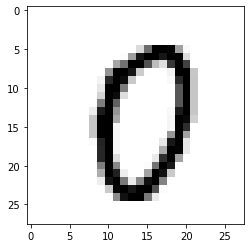

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[1000,:,:],cmap= 'binary')
plt.show()

In [4]:
import numpy as np
print(np.unique(labels))
print(images.shape)

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [5]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1
Xtrain = Xtrain.reshape(Xtrain.shape[0],-1)
Xtest = Xtest.reshape(Xtest.shape[0],-1)
Xtrain.shape

(60000, 784)

In [6]:
#costo regularizacion ortogonal
class MyRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, lam):
        self.lam = lam
    def __call__(self, x):
        E = tf.linalg.matmul(x,x,transpose_a=True)-tf.eye(tf.shape(x)[1]) 
        return self.lam * tf.linalg.trace(tf.linalg.matmul(E,E))


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputA (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
encoder (Dense)              (None, 2)                 1568      
_________________________________________________________________
decoder (Dense)              (None, 784)               1568      
Total params: 3,136
Trainable params: 3,136
Non-trainable params: 0
_________________________________________________________________


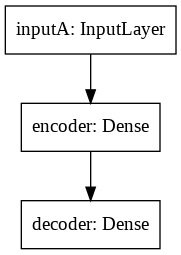

In [7]:
lam = 1
Q = 2

encoder = tf.keras.layers.Dense(Q,activation="linear", name='encoder',use_bias=False,kernel_regularizer=MyRegularizer(lam=lam))
                          #kernel_regularizer=MyRegularizer(lam=lam))


decoder = tf.keras.layers.Dense(Xtrain.shape[1],activation="linear", name='decoder',use_bias=False,kernel_regularizer=MyRegularizer(lam=lam))
#                          kernel_regularizer=MyRegularizer(lam=lam))

inputA = tf.keras.layers.Input(shape=(Xtrain.shape[1]), name='inputA')
enc = encoder(inputA)
dec = decoder(enc)

model = tf.keras.Model(inputs=inputA,outputs=dec)

model.compile(loss=tf.keras.losses.MeanSquaredError(), #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

model.summary()
tf.keras.utils.plot_model(model)


In [8]:
history = model.fit(Xtrain, Xtrain , epochs=100,batch_size=256, # 32, 64, 128, 256
                    validation_split=0.2)

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 782.2515 - val_loss: 782.1109
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 782.1113 - val_loss: 782.1099
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 782.1086 - val_loss: 782.1028
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0956 - val_loss: 782.0856
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 782.0784 - val_loss: 782.0705
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 782.0671 - val_loss: 782.0651
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0635 - val_loss: 782.0639
Epoch 8/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0631 - val_loss: 782.0632
Epoch 9/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0630 - val_loss: 782.0631
Epoch 10/100
188/188 [==============================] -

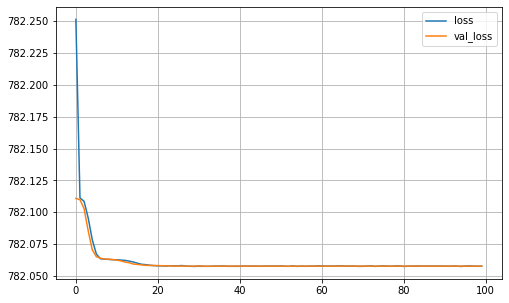

In [9]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [10]:
model_enc = tf.keras.Model(inputs=model.input,outputs=model.get_layer('encoder').output)
zest = model_enc.predict(Xtest)
zest.shape

(10000, 2)

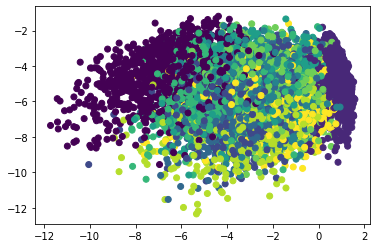

In [11]:
plt.scatter(zest[:,0],zest[:,1],c=ytest)
plt.show()

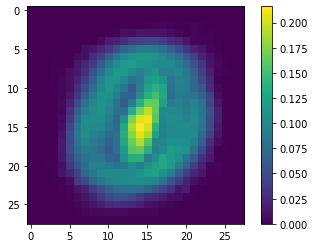

In [14]:
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

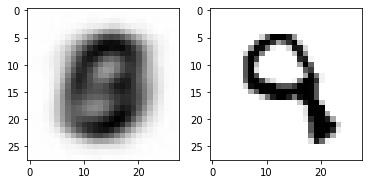

In [15]:
Xteste = model.predict(Xtest)
plt.subplot(121)
plt.imshow(Xteste[4000].reshape(28,28),cmap='binary')
plt.subplot(122)
plt.imshow(Xtest[4000].reshape(28,28),cmap='binary')
plt.show()

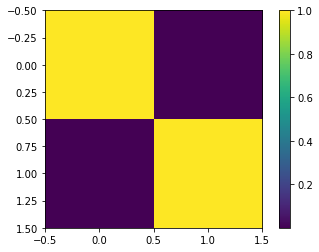

In [16]:
W = model.layers[1].get_weights()[0]
plt.imshow((W.T).dot(W))
plt.colorbar()
plt.show()